In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import swifter
import json
import numpy as np 
from google.cloud import bigquery
from google.oauth2 import service_account

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

In [5]:
df_liwc_tweets = pd.read_csv('LIWC_topics_all_tweets_updated.csv')

In [6]:
df_liwc_tweets

,id,id_str,created_at,date,neg,neu,pos,compound,Anger_words,Sexual_words,...,Drives_words,Affiliation_words,Achieve_words,Power_words,Reward_words,Risk_words,Death_words,Dominant_Topic,Topic_Perc_Contrib,full_text
0,505938323039596540,505938323039596544,2014-08-31 04:41:10+00:00,2014-08-31,0.202,0.798,0.000,-0.5080,1,0,...,0,0,0,0,0,0,0,3,0.3128,were going to go to college! damn right you ar...
1,501425032648998900,501425032648998912,2014-08-18 17:46:58+00:00,2014-08-18,0.000,1.000,0.000,0.0000,0,0,...,1,0,0,1,0,0,0,7,0.3089,one of the scariest things re mikebrown is tha...
2,500154972886302700,500154972886302720,2014-08-15 05:40:12+00:00,2014-08-15,0.333,0.667,0.000,-0.6124,1,0,...,1,1,0,1,0,0,0,12,0.3753,dispatches tracking us police brutality $URL$ ...
3,499331851648237600,499331851648237569,2014-08-12 23:09:25+00:00,2014-08-12,0.000,0.816,0.184,0.4019,0,0,...,1,0,0,1,0,0,0,2,0.3762,i thought youd appreciate this short piece re ...
4,500079246484582400,500079246484582400,2014-08-15 00:39:18+00:00,2014-08-15,0.000,1.000,0.000,0.0000,0,0,...,0,0,0,0,0,0,0,1,0.3747,its all a domino effect mikebrown ferguson lei...
5,501620545302302700,501620545302302721,2014-08-19 06:43:52+00:00,2014-08-19,0.000,0.903,0.097,0.1280,0,0,...,1,0,0,1,0,0,0,8,0.4341,exclusive twista hiphop opens up about the mik...
6,501272871814303740,501272871814303744,2014-08-18 07:42:20+00:00,2014-08-18,0.000,1.000,0.000,0.0000,1,1,...,1,0,0,1,0,0,0,8,0.3750,why send the army into the town and not just t...
7,499159629968834560,499159629968834560,2014-08-12 11:45:04+00:00,2014-08-12,0.415,0.585,0.000,-0.8316,1,0,...,1,0,0,1,0,0,1,8,0.3750,teen killed by officer confirmed as unarmed an...
8,499957374212263940,499957374212263936,2014-08-14 16:35:01+00:00,2014-08-14,0.415,0.585,0.000,-0.8316,1,0,...,1,0,0,1,0,0,1,8,0.3747,teen killed by officer confirmed as unarmed an...
9,500876951821615100,500876951821615104,2014-08-17 05:29:05+00:00,2014-08-17,0.415,0.585,0.000,-0.8316,1,0,...,1,0,0,1,0,0,1,8,0.3749,teen killed by officer confirmed as unarmed an...


In [7]:
df_keys = ['Anger_words', 'Sexual_words',
        'Anx_words', 'Sad_words', 'Social_words', 'Percept_words', 
        'Drives_words', 'Affiliation_words',
        'Achieve_words', 'Power_words', 'Reward_words', 'Risk_words', 'Death_words']
pivoted_df = pd.pivot_table(df_liwc_tweets, index= 'date', columns= 'Dominant_Topic', values= df_keys, aggfunc = 'sum')
pivoted_df.head()

Achieve_words                                              \
Dominant_Topic            1      2     3     4     5     6     7      8    
date                                                                       
2014-08-09               NaN    NaN   NaN   NaN   NaN   NaN   0.0    NaN   
2014-08-10              11.0   19.0   4.0   6.0  13.0  17.0  17.0   39.0   
2014-08-11              56.0  104.0  17.0  18.0  26.0   7.0  18.0  113.0   
2014-08-12              65.0   88.0  35.0  23.0  31.0  15.0  51.0   77.0   
2014-08-13              74.0   92.0  28.0  23.0  28.0  33.0  59.0   75.0   

                             ...   Social_words                              \
Dominant_Topic    9      10  ...             3      4      5      6      7    
date                         ...                                              
2014-08-09       0.0    NaN  ...            NaN    NaN    NaN    NaN    1.0   
2014-08-10      14.0   24.0  ...           65.0   41.0   62.0  211.0  187.0   
2014-08-11      77.0  206.0  ...          114.0   98.0  179.0  122.0  280.0   
2014-08-12      78.0  107.0  ...          145.0   83.0  213.0  130.0  618.0   
2014-08-13      68.0   94.0  ...          128.0  101.0  225.0  223.0  656.0   

                                                   
Dominant_Topic     8      9      10     11     12  
date                                               
2014-08-09        NaN    1.0    NaN    NaN    NaN  
2014-08-10      425.0  105.0  231.0  152.0   48.0  
2014-08-11      794.0  398.0  950.0  355.0  139.0  
2014-08-12      633.0  520.0  579.0  202.0  296.0  
2014-08-13      656.0  325.0  443.0  202.0  433.0  

[5 rows x 156 columns]

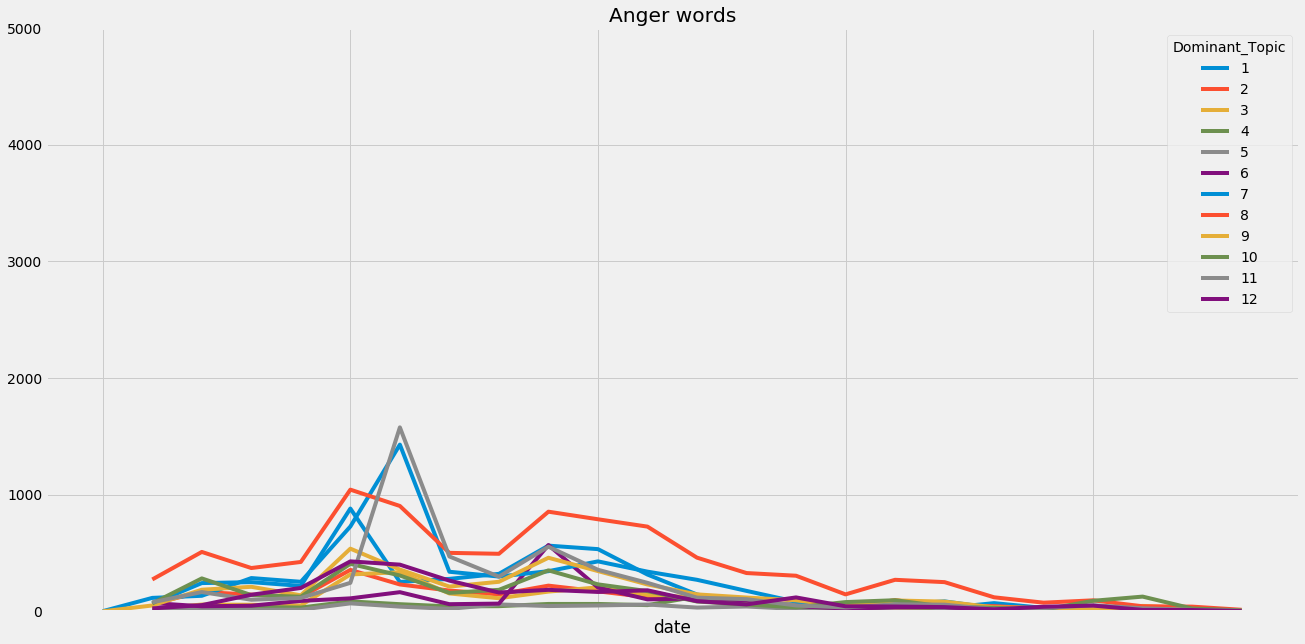

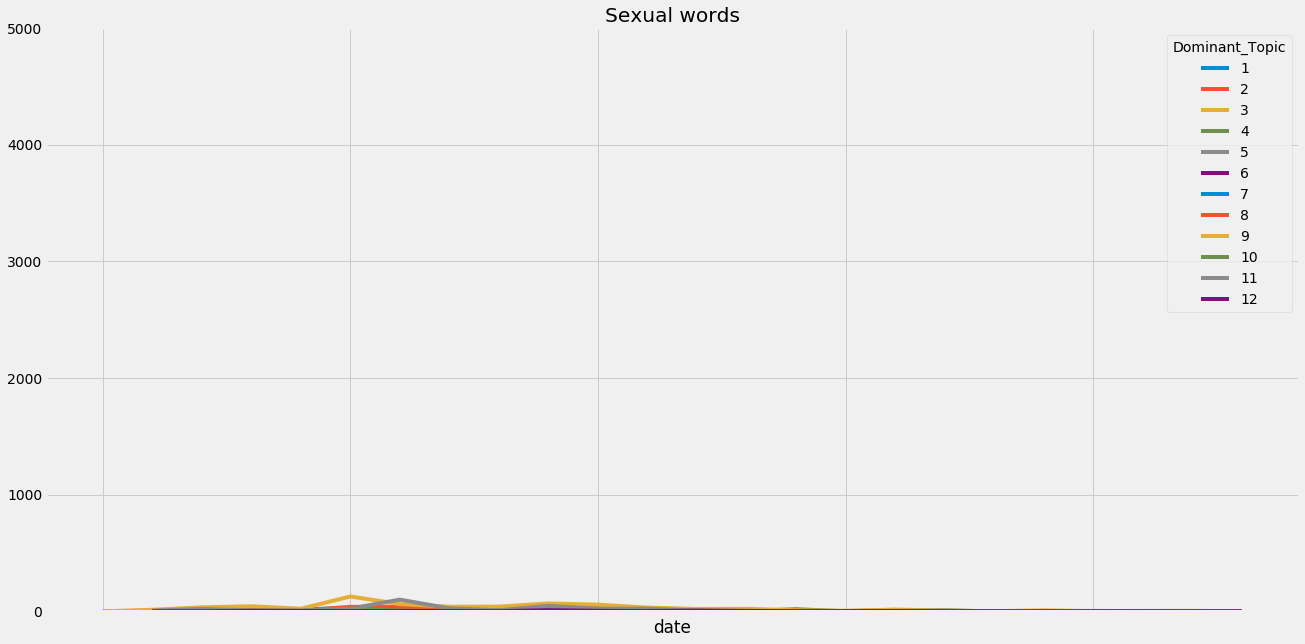

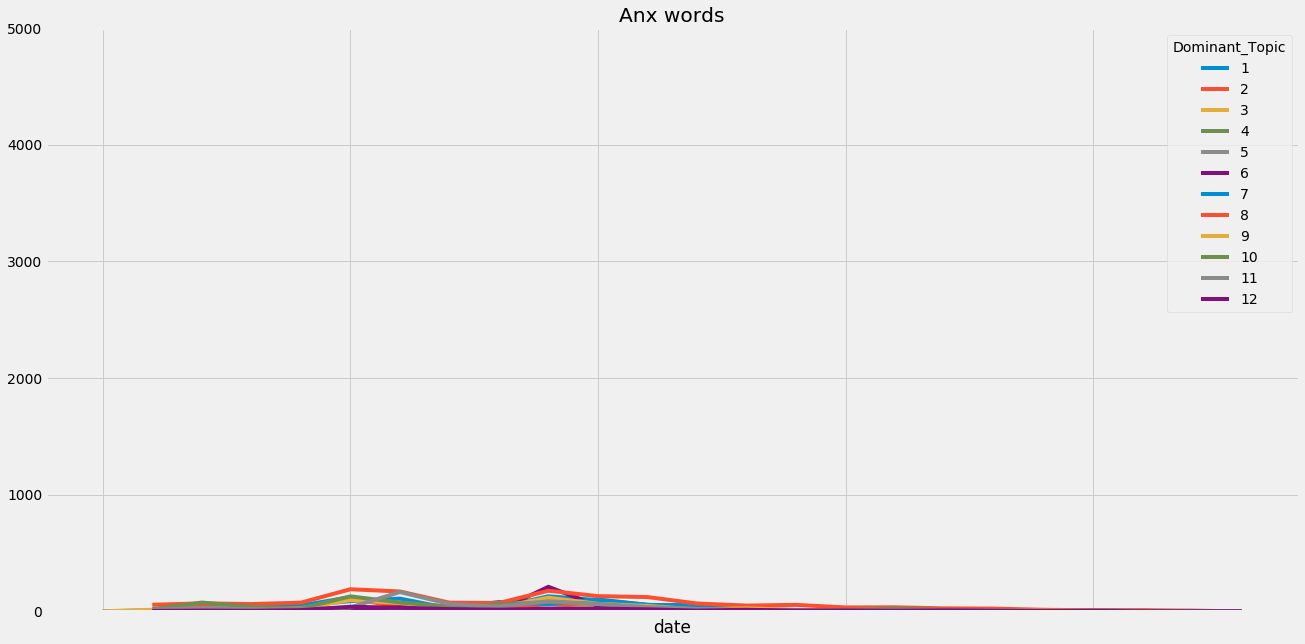

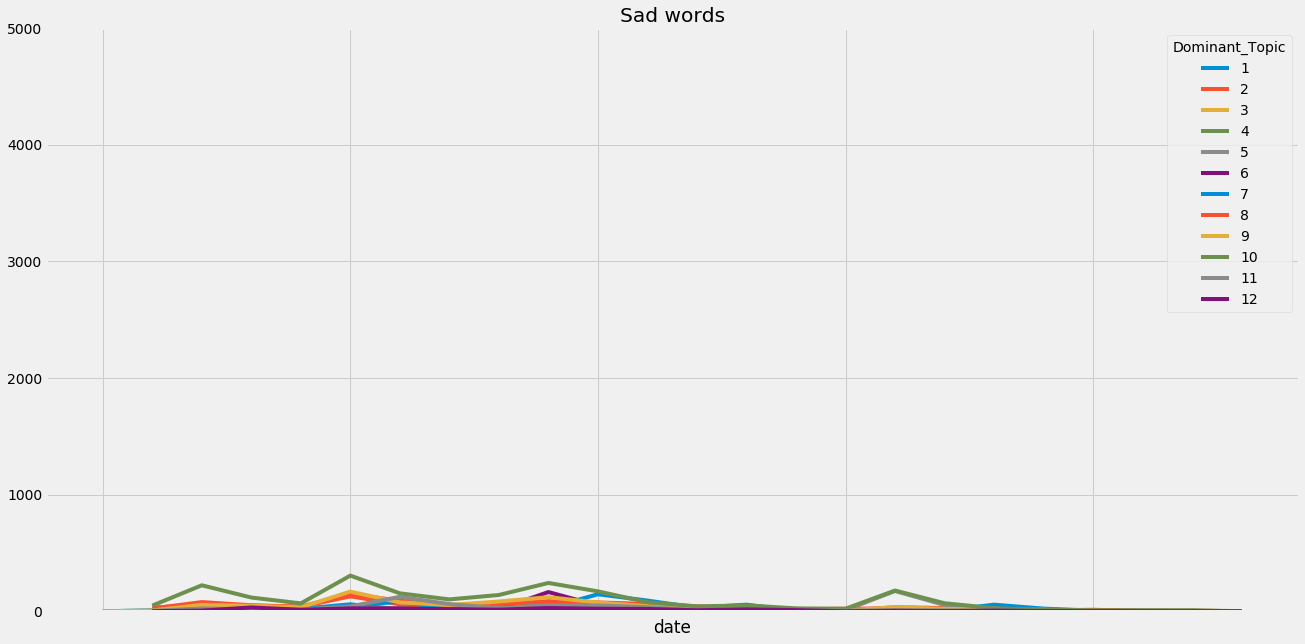

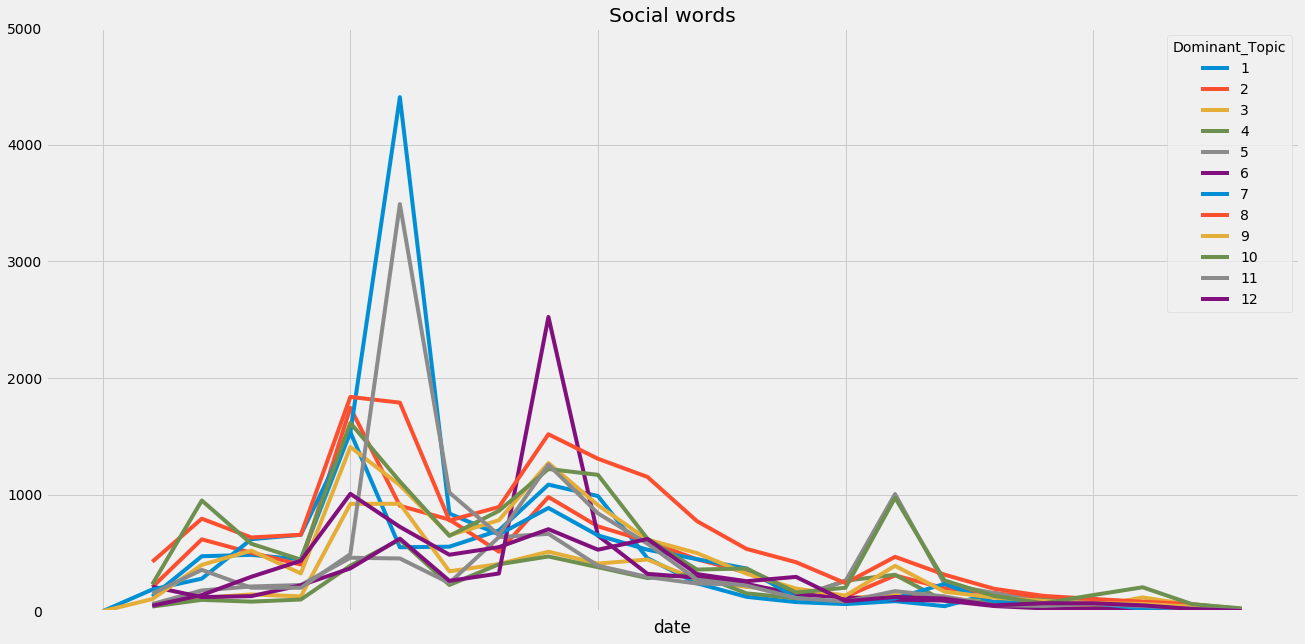

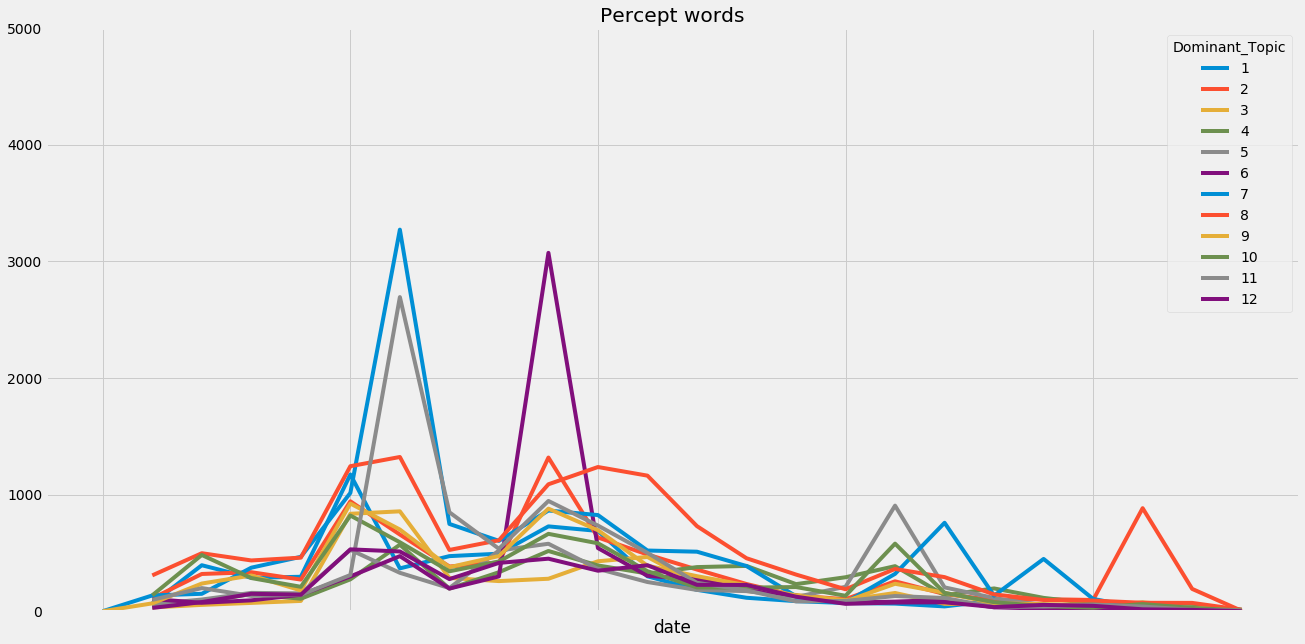

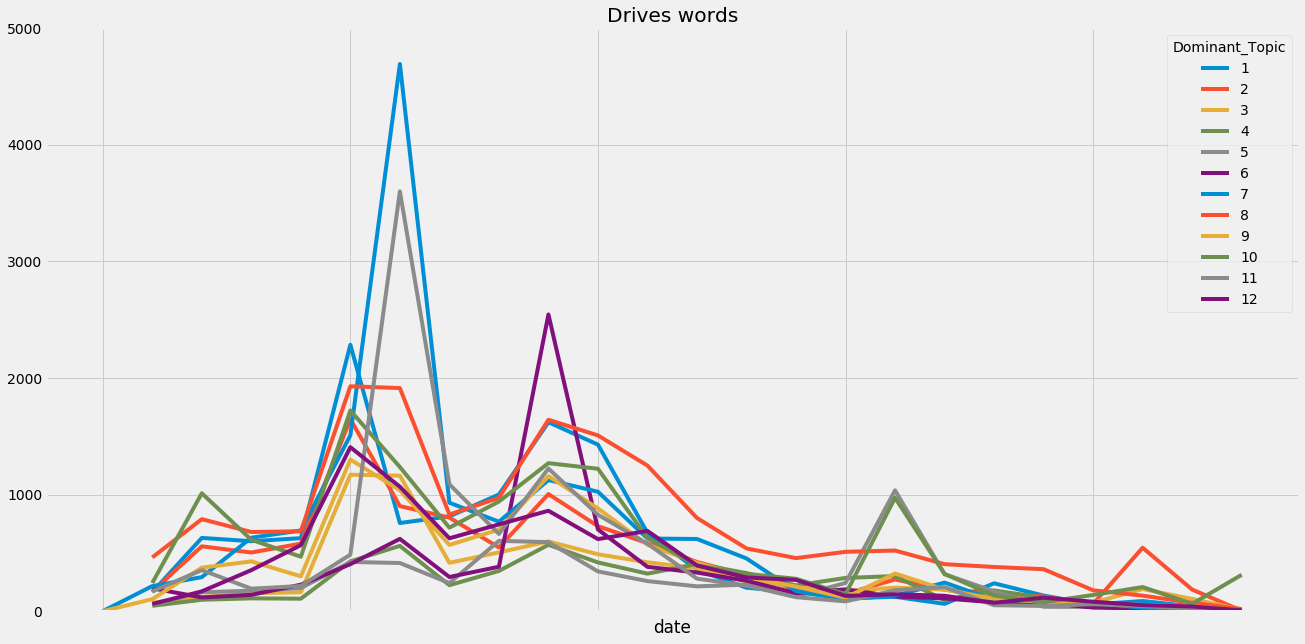

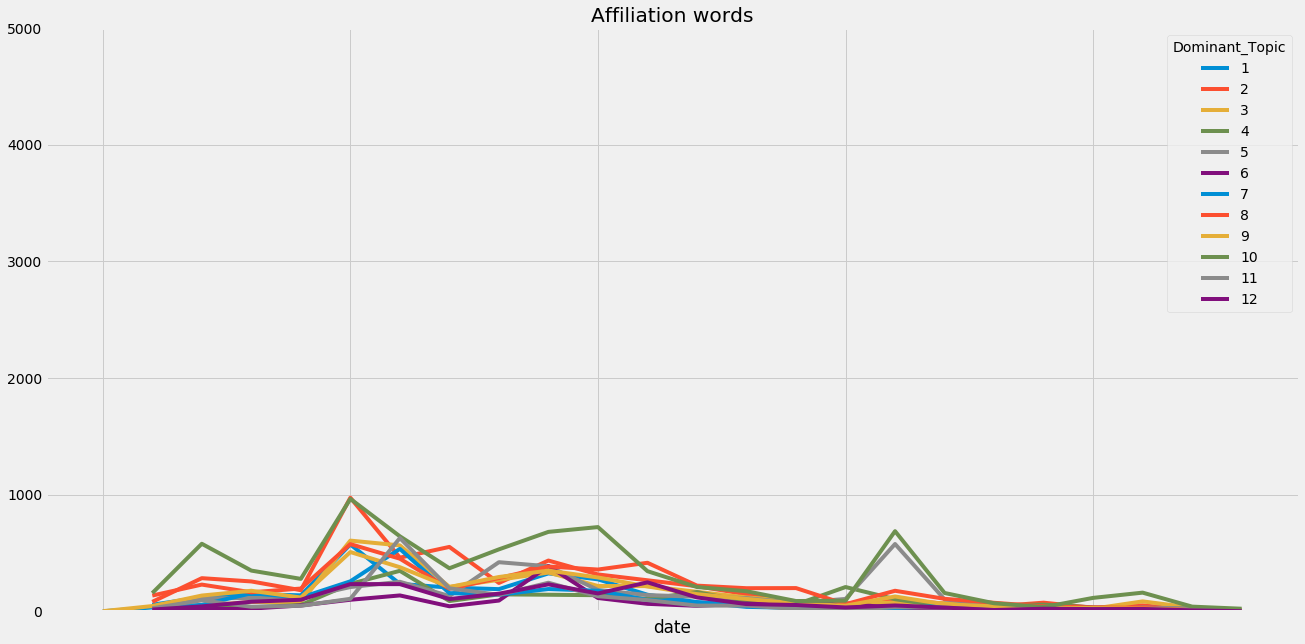

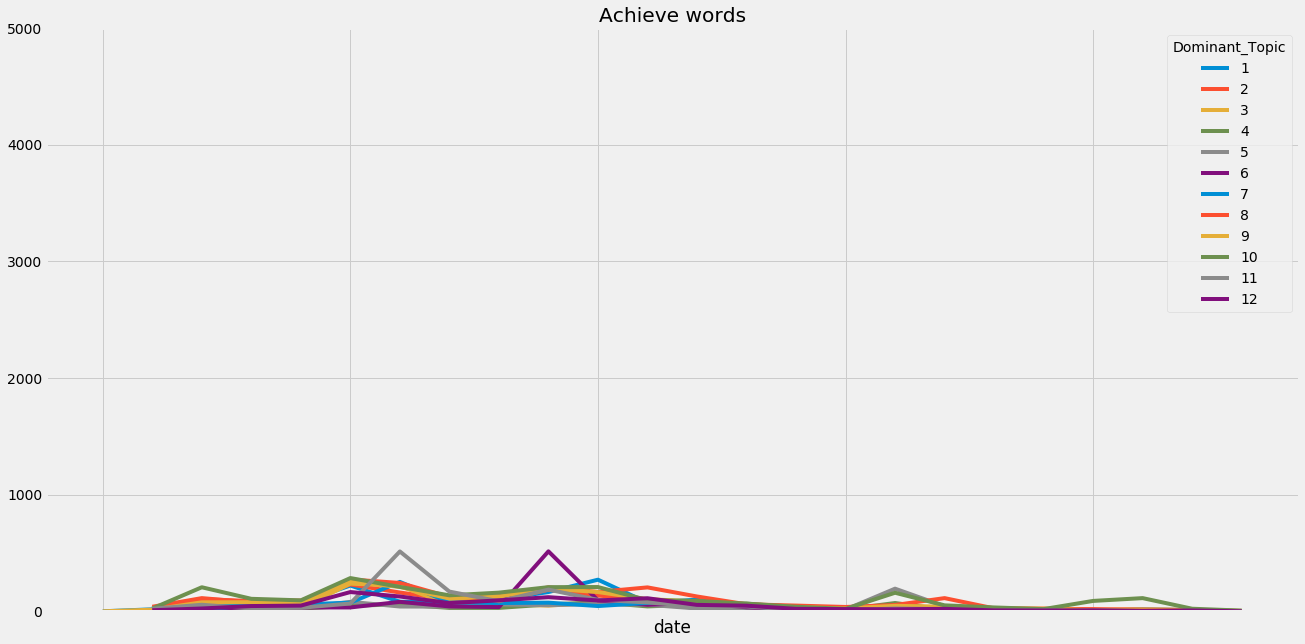

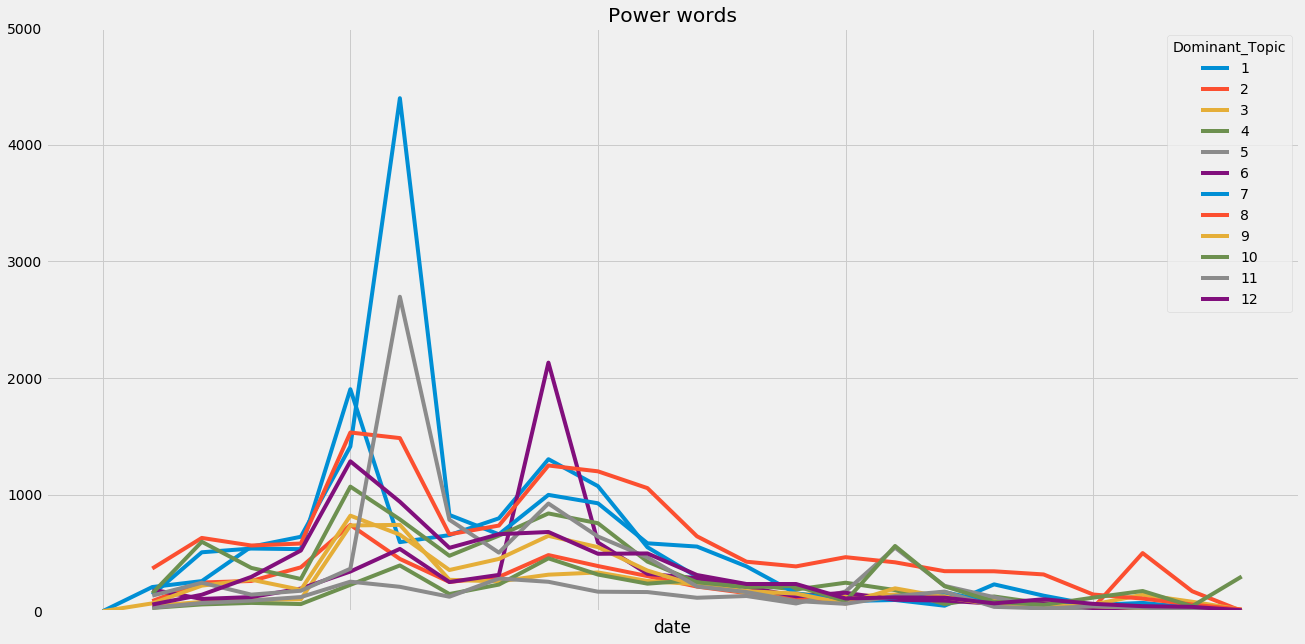

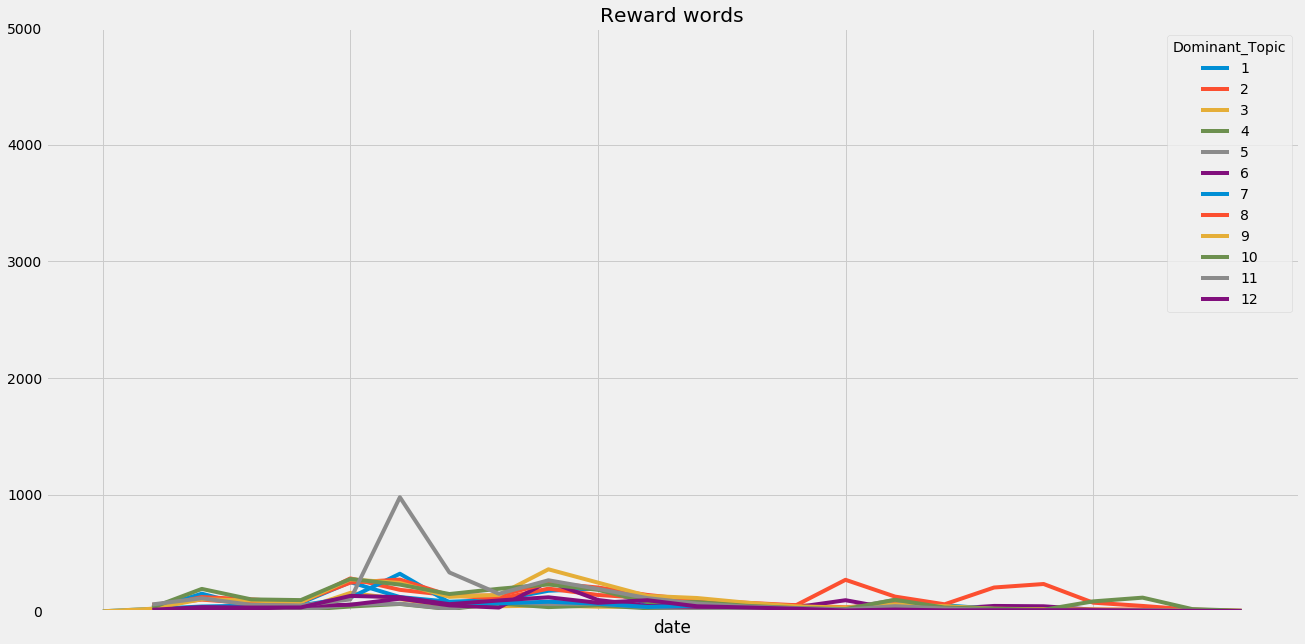

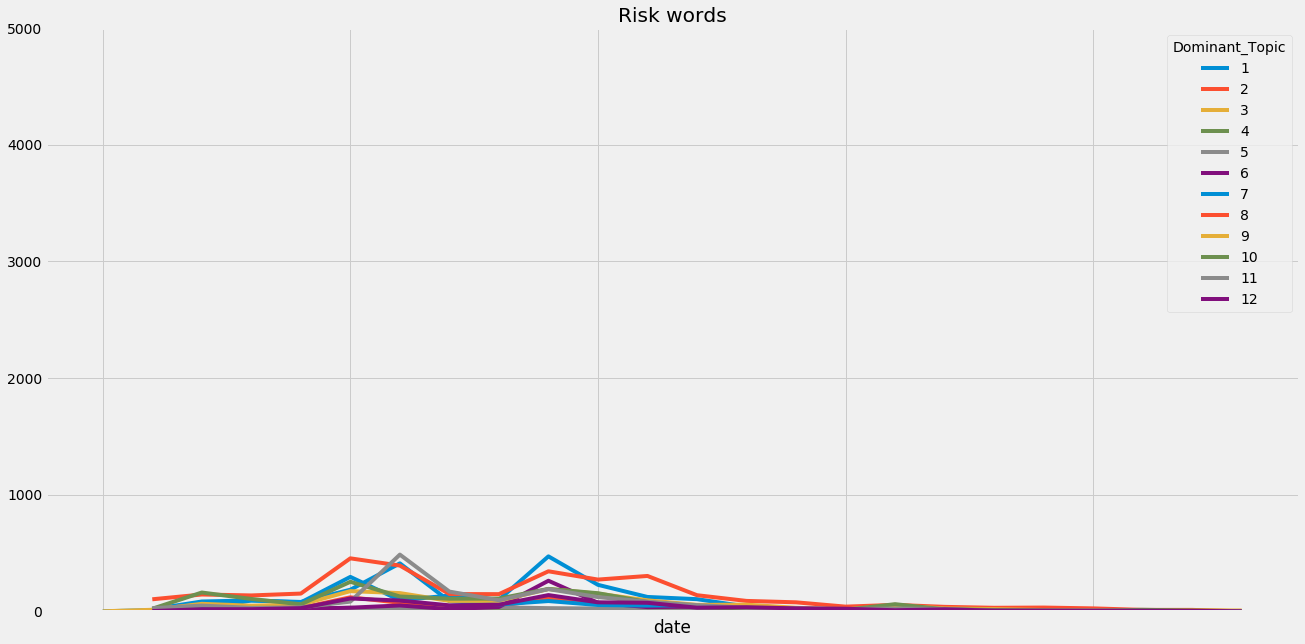

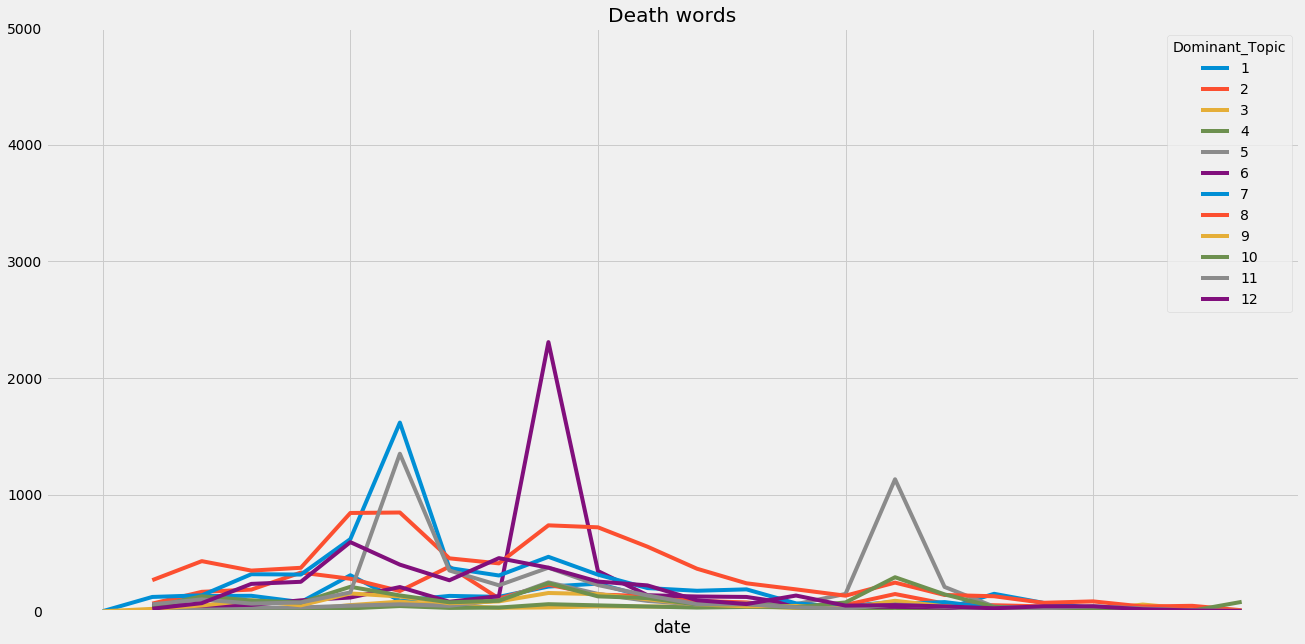

In [8]:
for i in df_keys:
    pivoted_df[i].plot(figsize=(20,10))
    plt.title('%s'%i.replace('_', ' '))
    plt.ylim(0,5000)

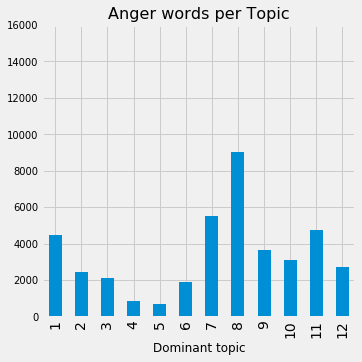

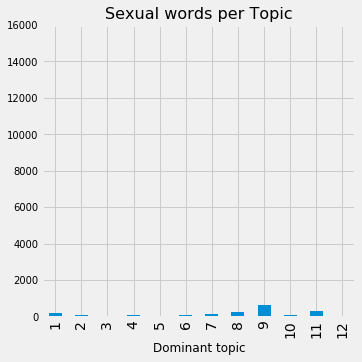

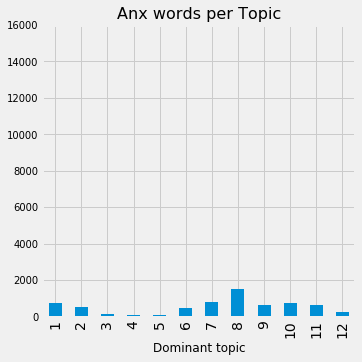

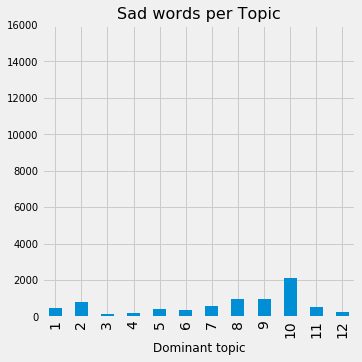

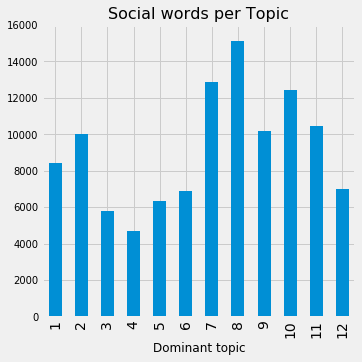

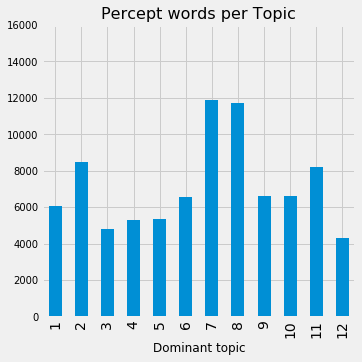

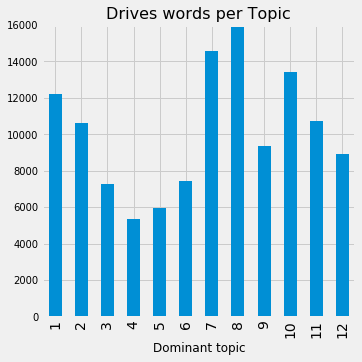

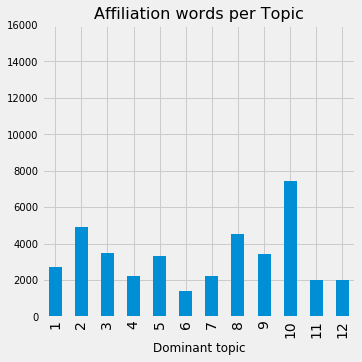

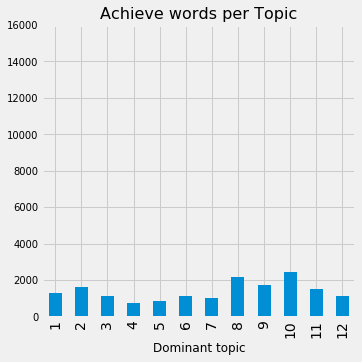

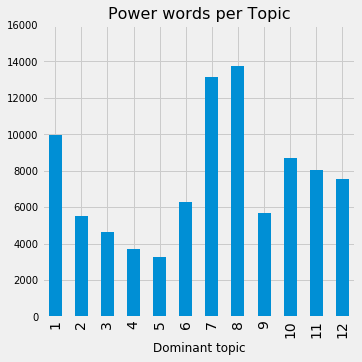

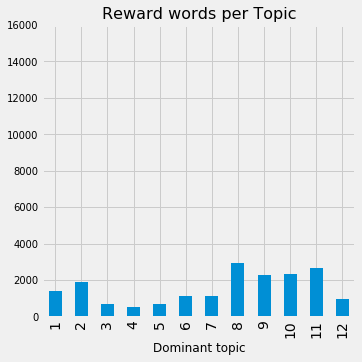

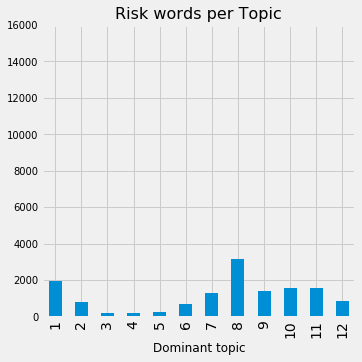

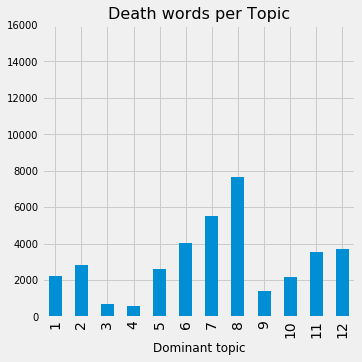

In [9]:
for i in df_keys:
    df_liwc_tweets.groupby('Dominant_Topic')[['%s'%i]].agg('sum').plot.bar(figsize=(5,5), legend=False)
    plt.ylim(0,16000)
    plt.yticks(fontsize=10)
    plt.title('%s per Topic'%i.replace('_',' '), fontsize=16)
    plt.xlabel('Dominant topic', fontsize=12)


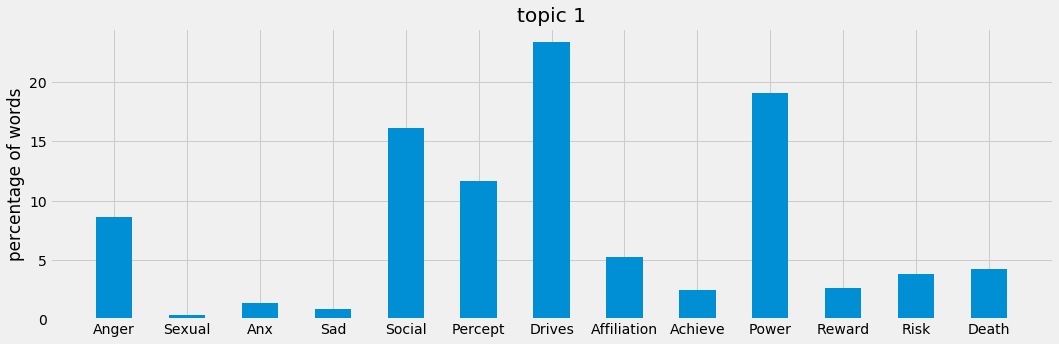

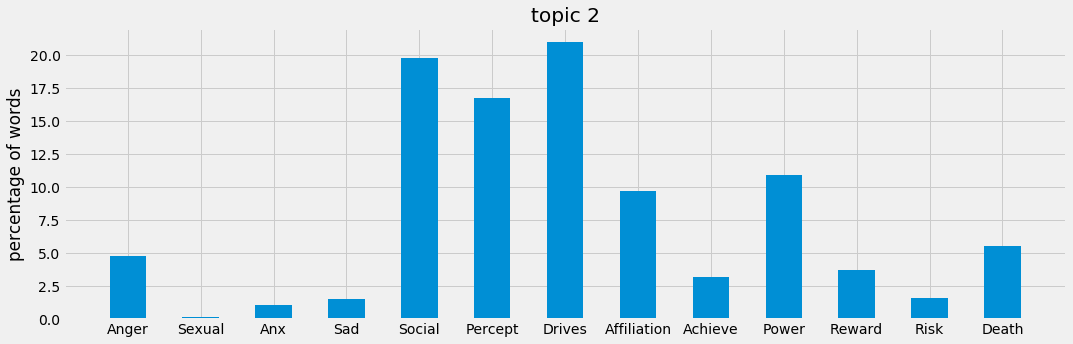

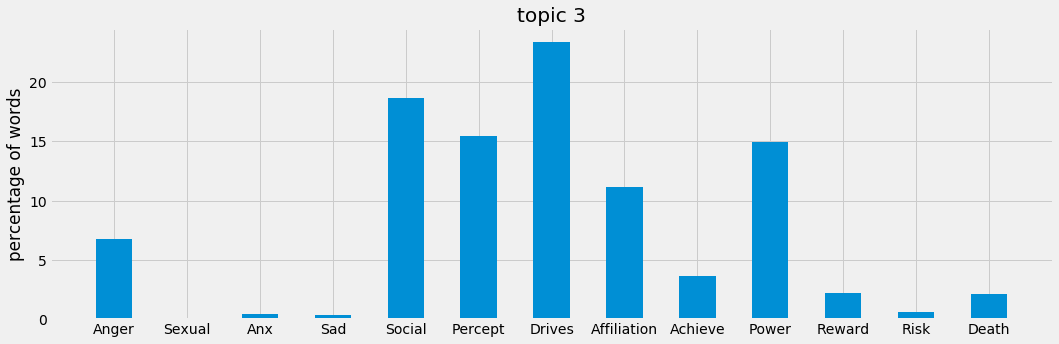

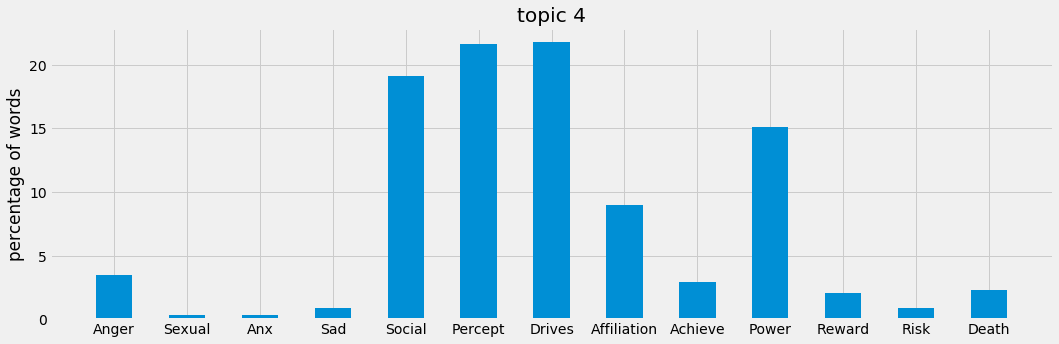

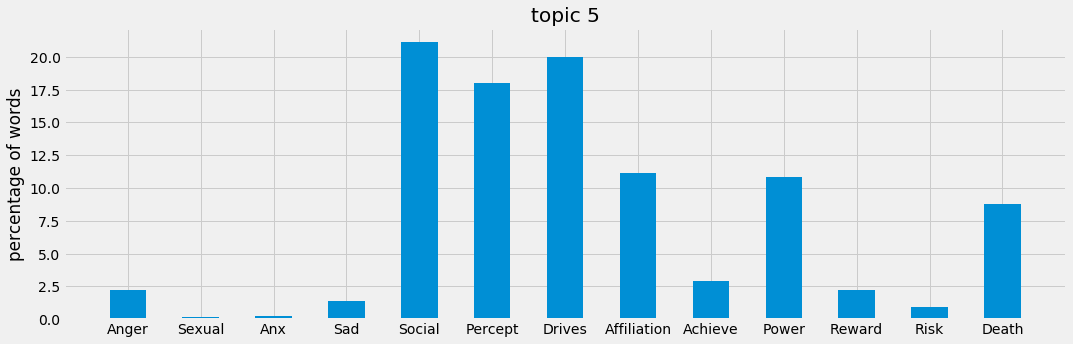

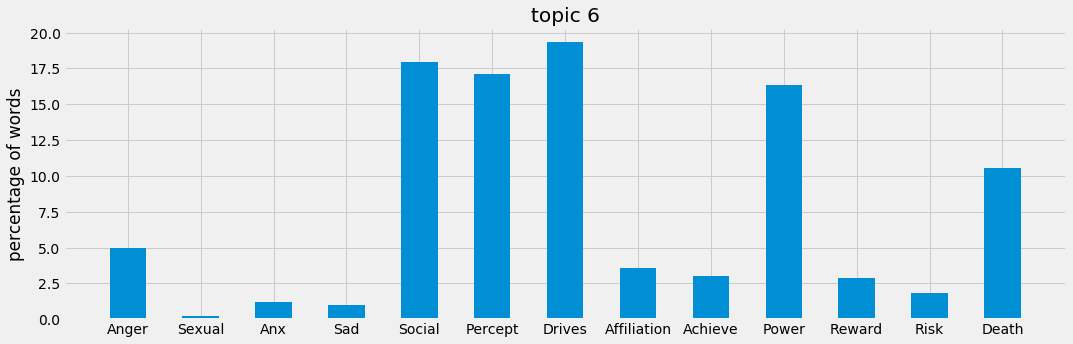

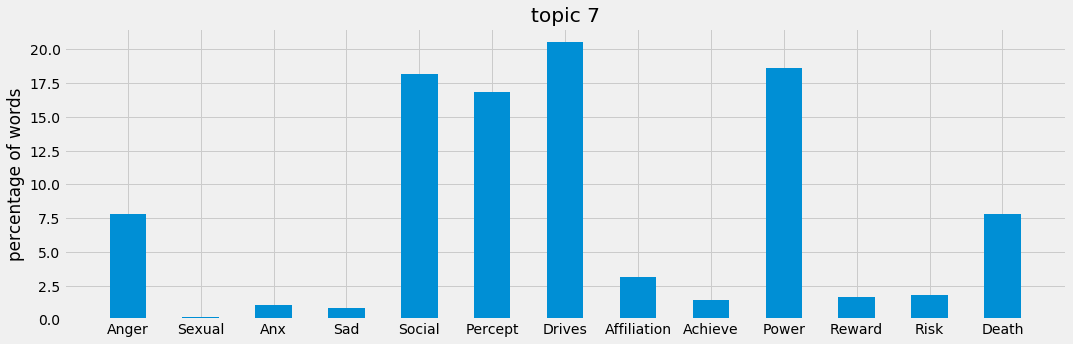

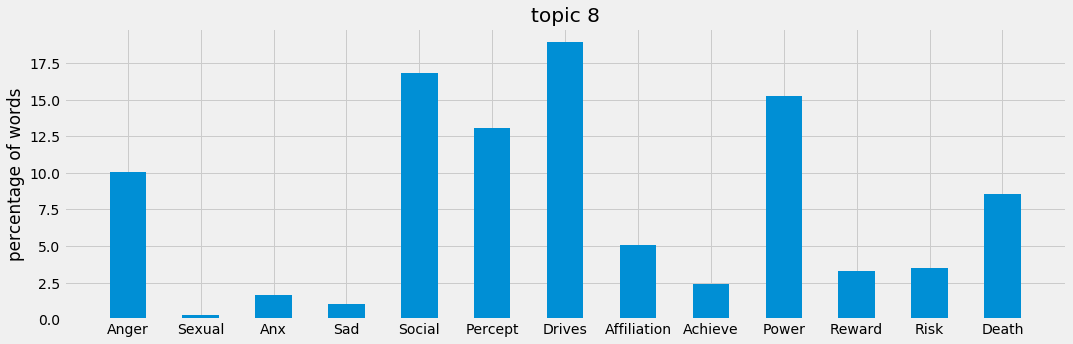

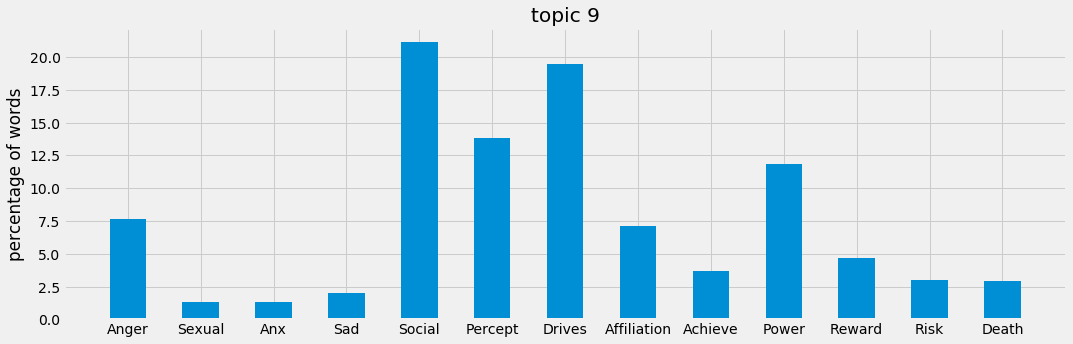

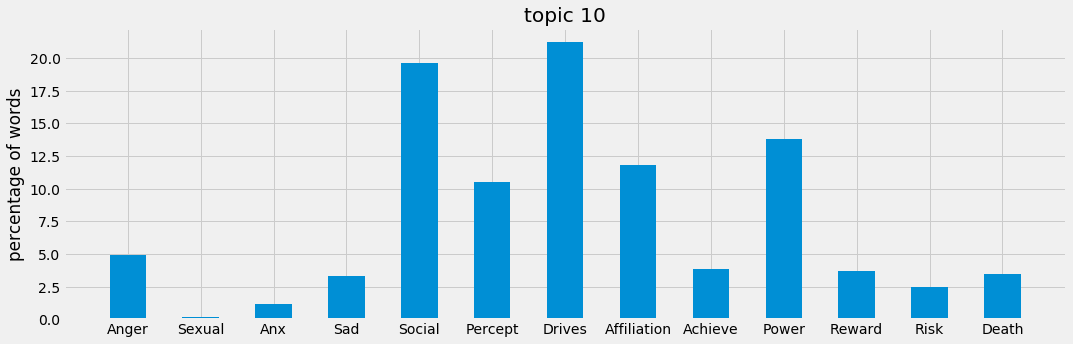

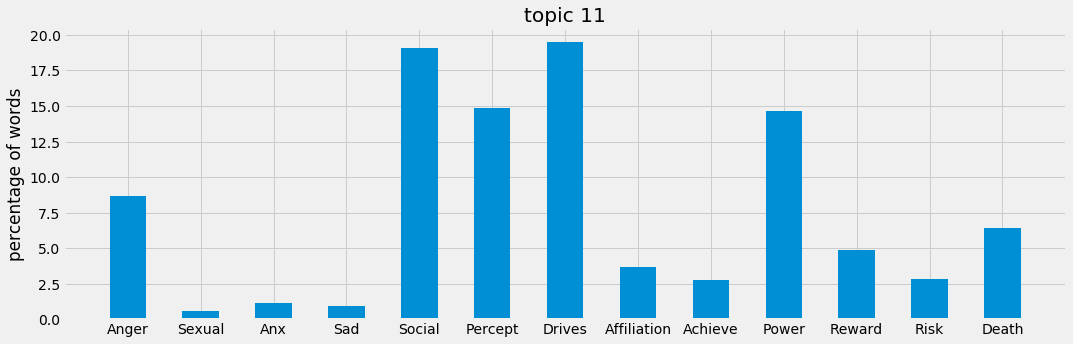

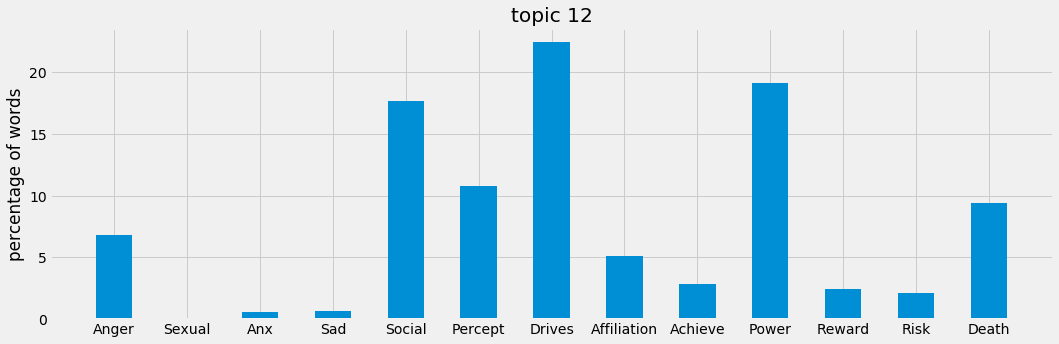

In [11]:
for topic in sorted(df_liwc_tweets['Dominant_Topic'].unique().tolist()):
    key_names = [i.split('_')[0] for i in df_keys]
    sums =[]
    for i in df_keys:
        s = df_liwc_tweets[df_liwc_tweets['Dominant_Topic']==topic][str(i)].sum()
        sums.append(s)
    percs = sums/np.sum(sums)*100
    plt.figure()
    plt.bar(x=key_names, height=percs, width=0.5)
    plt.rcParams["figure.figsize"] = (16,5)
    plt.ylabel('percentage of words')
    plt.title('topic %s'%topic)
    

Note ** The percentages are calculated assuming the categories specified as keys are the only categories present in tweets.